In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv('HepatitisCdata.csv')


In [2]:

# Step 2: Drop the unnecessary index column
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

# Step 3: Encode 'Category' into numerical labels for multi-class classification
category_mapping = {
    '0=Blood Donor': 0,
    '0s=suspect Blood Donor': 1,
    '1=Hepatitis': 2,
    '2=Fibrosis': 3,
    '3=Cirrhosis': 4
}
df['Category'] = df['Category'].map(category_mapping)

In [4]:

# Step 4: Encode 'Sex' column (Male = 0, Female = 1)
df['Sex'] = df['Sex'].map({'m': 0, 'f': 1})

# Step 5: Check for missing values
missing_values = df.isnull().sum()

# Step 6: Fill missing values with median (more robust to outliers)
df.fillna(df.median(numeric_only=True), inplace=True)


In [6]:

# Step 7: Check for duplicates and remove them
df.drop_duplicates(inplace=True)

# Step 8: Check for outliers using IQR (Interquartile Range) and replace extreme values
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 9: Cap outliers at lower and upper bounds
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = np.where(df[col] < lower_bound[col], lower_bound[col], df[col])
    df[col] = np.where(df[col] > upper_bound[col], upper_bound[col], df[col])

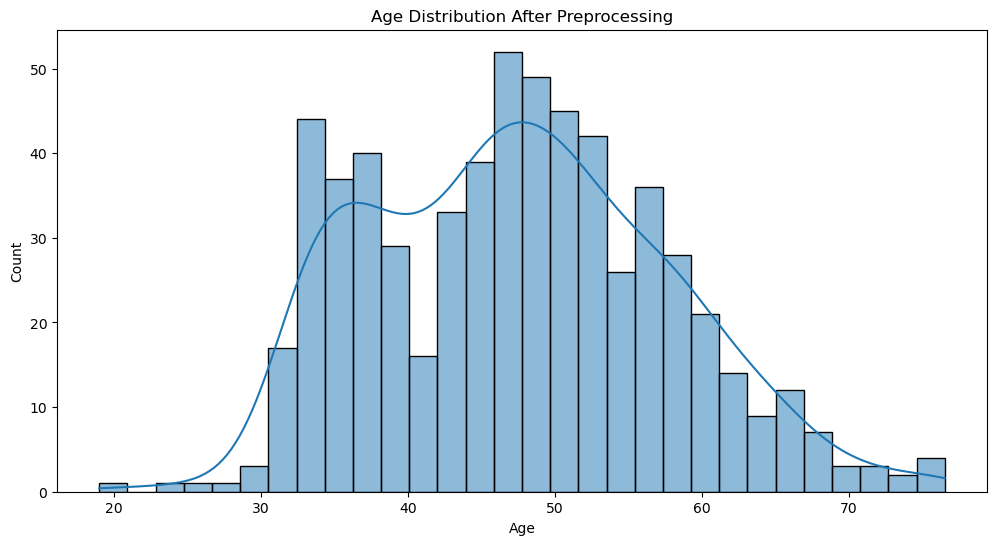

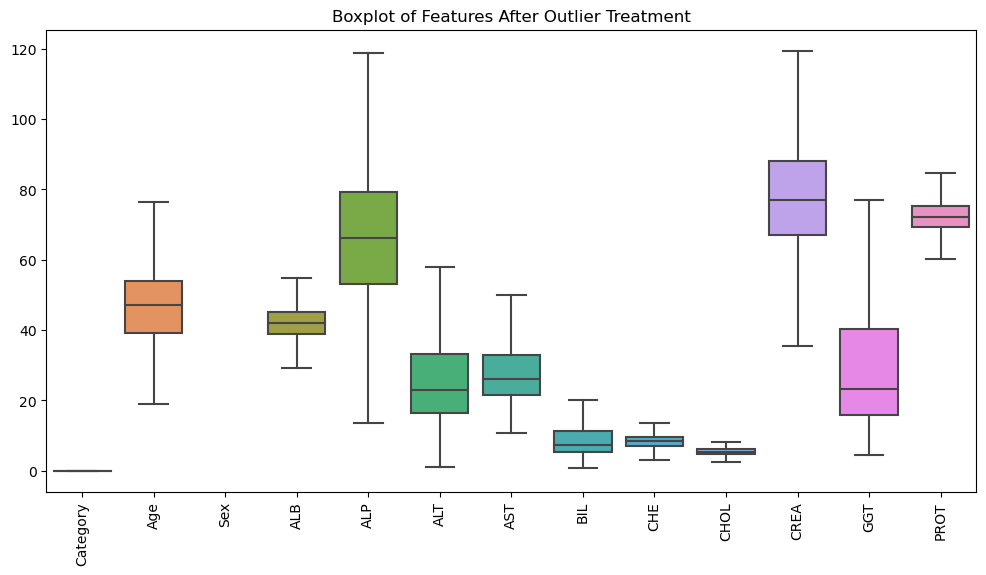

In [9]:

import warnings

# Ignore warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution After Preprocessing")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.xticks(rotation=90)
plt.title("Boxplot of Features After Outlier Treatment")
plt.show()

In [8]:
# Step 11: Save the cleaned dataset
df.to_csv("Preprocessed_HepatitisCdata.csv", index=False)

# Step 12: Display summary of preprocessing steps
preprocessed_summary = {
    "Missing Values After Handling": df.isnull().sum().sum(),
    "Duplicates Removed": df.duplicated().sum(),
    "Dataset Shape After Preprocessing": df.shape
}

print("Preprocessing Summary:", preprocessed_summary)


Preprocessing Summary: {'Missing Values After Handling': 615, 'Duplicates Removed': 0, 'Dataset Shape After Preprocessing': (615, 13)}
